# ANZ virtaul experience program
## Challenge 1
#### Implement EDA (exploratory data analysis)
Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.

### Importing necessary libraries

In [0]:
# !pip install geopandas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
%matplotlib inline

### Analyzing the dataset

In [3]:
#Load excel into a pandas dataFrame.
train=pd.read_excel("ANZ synthesised transaction dataset.xlsx")
train.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
# No. of data-points and features
print (train.shape)

(12043, 23)


In [5]:
# The column names in our dataset
print (train.columns)

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')


In [6]:
# No. of customers
customers=train["account"].nunique()
customers

100

In [7]:
# No. of transactions present for each status type
train["status"].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [8]:
# No. of transactions present for each currency type
train["currency"].value_counts()

AUD    12043
Name: currency, dtype: int64

**Observation(s):**

Since all the transactions are in the same currency type, the currency column can be dropped.

In [9]:
# No. of transactions present for each country type
train["country"].value_counts()

Australia    12043
Name: country, dtype: int64

**Observation(s):**

Since all the transactions are in the same country, the country column can be dropped.

In [10]:
# No. of transactions present for each gender type
train["gender"].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [11]:
# No. of transactions present for each movement type
train["movement"].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [12]:
# No. of transactions present for each txn description type
train["txn_description"].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [13]:
# No. of transactions present for each merchant state type
train["merchant_state"].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [14]:
# No. of null values for each column
train.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [15]:
# Dropping the columns which will not provide any insights like ID'S, latitude values, status etc
train.drop(['card_present_flag', 'bpay_biller_code', 'long_lat', 'merchant_id', 'merchant_code', 'first_name', 
            'transaction_id', 'customer_id', 'currency', 'country', 'merchant_suburb', 'merchant_state',
            'balance','status'], axis=1, inplace=True)
train.head()

,account,txn_description,date,gender,age,extraction,amount,merchant_long_lat,movement
0,ACC-1598451071,POS,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,153.38 -27.99,debit
1,ACC-1598451071,SALES-POS,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,151.21 -33.87,debit
2,ACC-1222300524,POS,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,151.21 -33.87,debit
3,ACC-1037050564,SALES-POS,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,153.05 -26.68,debit
4,ACC-1598451071,SALES-POS,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,153.44 -28.06,debit


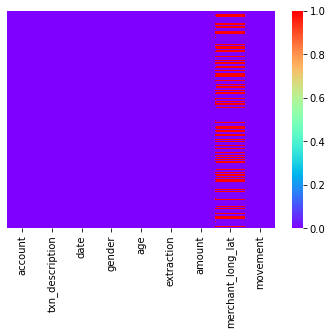

In [16]:
# Checking if any null values still exists
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap="rainbow")

**Observation(s)**:

There are no null values except for merchant longitudes and latitudes.

In [17]:
train.dtypes

account                      object
txn_description              object
date                 datetime64[ns]
gender                       object
age                           int64
extraction                   object
amount                      float64
merchant_long_lat            object
movement                     object
dtype: object

In [18]:
# Extracting time, date, month, weekday from the timestamp 
train['time'] = pd.to_datetime(train['extraction']).dt.time
train['date'] = pd.to_datetime(train['extraction']).dt.date
train['month'] = pd.to_datetime(train['extraction']).dt.month
train['day'] = pd.to_datetime(train['extraction']).dt.weekday
train['hour'] = pd.to_datetime(train['extraction']).dt.hour
train.head()

,account,txn_description,date,gender,age,extraction,amount,merchant_long_lat,movement,time,month,day,hour
0,ACC-1598451071,POS,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,153.38 -27.99,debit,01:01:15,8,2,1
1,ACC-1598451071,SALES-POS,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,151.21 -33.87,debit,01:13:45,8,2,1
2,ACC-1222300524,POS,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,151.21 -33.87,debit,01:26:15,8,2,1
3,ACC-1037050564,SALES-POS,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,153.05 -26.68,debit,01:38:45,8,2,1
4,ACC-1598451071,SALES-POS,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,153.44 -28.06,debit,01:51:15,8,2,1


In [19]:
# Dropping extraction column 
train.drop(['extraction'], axis=1, inplace=True)
train.head()

,account,txn_description,date,gender,age,amount,merchant_long_lat,movement,time,month,day,hour
0,ACC-1598451071,POS,2018-08-01,F,26,16.25,153.38 -27.99,debit,01:01:15,8,2,1
1,ACC-1598451071,SALES-POS,2018-08-01,F,26,14.19,151.21 -33.87,debit,01:13:45,8,2,1
2,ACC-1222300524,POS,2018-08-01,M,38,6.42,151.21 -33.87,debit,01:26:15,8,2,1
3,ACC-1037050564,SALES-POS,2018-08-01,F,40,40.90,153.05 -26.68,debit,01:38:45,8,2,1
4,ACC-1598451071,SALES-POS,2018-08-01,F,26,3.25,153.44 -28.06,debit,01:51:15,8,2,1


In [20]:
# Re-arranging the columns
train=train[['date', 'time', 'month', 'day', 'hour', 'account', 'gender', 'age', 'amount', 'txn_description', 'movement', 'merchant_long_lat']]
train.head()

,date,time,month,day,hour,account,gender,age,amount,txn_description,movement,merchant_long_lat
0,2018-08-01,01:01:15,8,2,1,ACC-1598451071,F,26,16.25,POS,debit,153.38 -27.99
1,2018-08-01,01:13:45,8,2,1,ACC-1598451071,F,26,14.19,SALES-POS,debit,151.21 -33.87
2,2018-08-01,01:26:15,8,2,1,ACC-1222300524,M,38,6.42,POS,debit,151.21 -33.87
3,2018-08-01,01:38:45,8,2,1,ACC-1037050564,F,40,40.90,SALES-POS,debit,153.05 -26.68
4,2018-08-01,01:51:15,8,2,1,ACC-1598451071,F,26,3.25,SALES-POS,debit,153.44 -28.06


In [21]:
train.dtypes

date                  object
time                  object
month                  int64
day                    int64
hour                   int64
account               object
gender                object
age                    int64
amount               float64
txn_description       object
movement              object
merchant_long_lat     object
dtype: object

### 2-D Scatter Plot

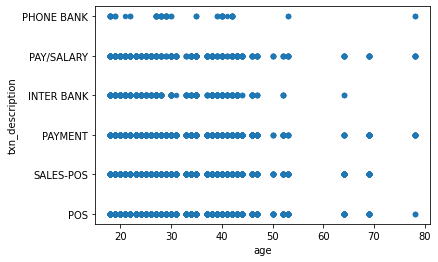

In [22]:
#2-D scatter plot:
train.plot(kind='scatter', x='age', y='txn_description')
plt.show()

**Observation(s):**

1) For people in the age range 60-80, there are very less transaction as compared to other age ranges.

2) People in the age range 60-70 don't have phone banking transactions.

3) People in the age range 70-80 don't have inter bank transactions.

4) People have less phone banking transactions as compared to others transactions.

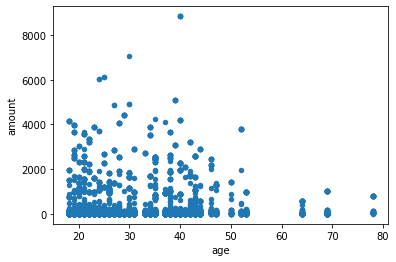

In [23]:
#2-D scatter plot:
train.plot(kind='scatter', x='age', y='amount')
plt.show()

**Observation(s):**

1) For the transaction amount greater than 4000, there are very less transactions.

2) For the age range 20-50, many small amount transactions are made.

3) For the age range 60-80, no transactions are made above the amount of 2000.

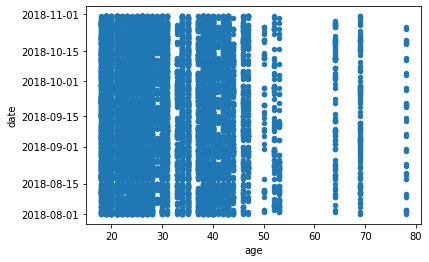

In [24]:
#2-D scatter plot:
train.plot(kind='scatter', x='age', y='date')
plt.show()

**Observation(s):**

1) In the age range 20-50, many people do transactions for the 3 months period.

2) In the age range 50-80, very less people do transactions for the 3 months period. 

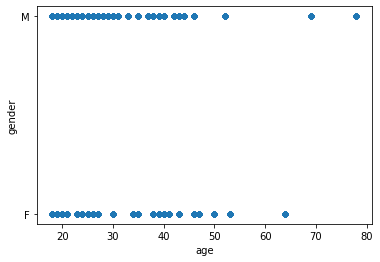

In [25]:
#2-D scatter plot:
train.plot(kind='scatter', x='age', y='gender')
plt.show()

**Observation(s):**

1) For the age range 70-80, no females do any transactions.

2) For the age range 60-70, no males do any transactions.

3) Higher number of transactions are done by males.

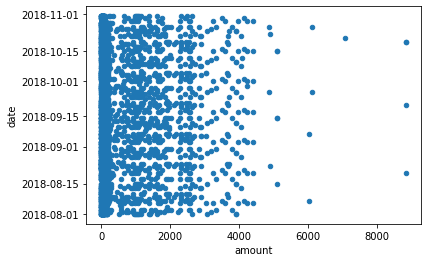

In [26]:
#2-D scatter plot:
train.plot(kind='scatter', x='amount', y='date')
plt.show()

**Observation(s):**

1) For the amount greater than 4000, there are very less transactions.

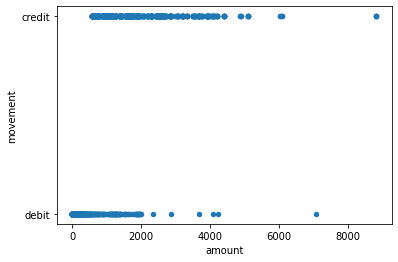

In [27]:
#2-D scatter plot:
train.plot(kind='scatter', x='amount', y='movement')
plt.show()

**Observation(s):**

1) For the amount range 2000-4000, more credit transactions are done as compared to debit.

2) For amount greater than 5000, very less debit and credit transactions are done.

### Countplot

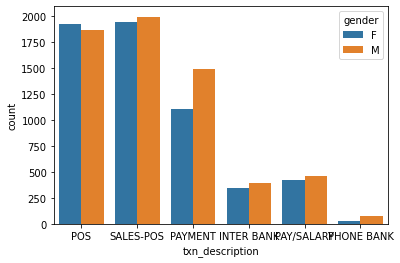

In [28]:
sns.countplot(x="txn_description",hue="gender",data=train)

**Observation(s):**

1) Females do less phone and payment transactions as compared to males.

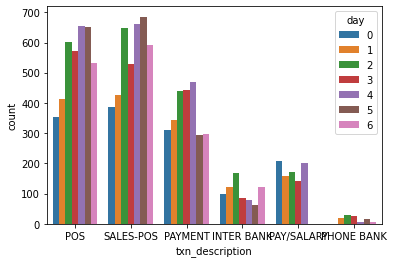

In [29]:
sns.countplot(x="txn_description",hue="day",data=train)

**Observation(s):**

1) Highest transactions are observed on friday and saturday for pos and sales-pos.

2) Highest transactions are observed on friday for payment.

3) Most salary credit transactions are done on monday and friday.

Note: monday == 0 and sunday == 6

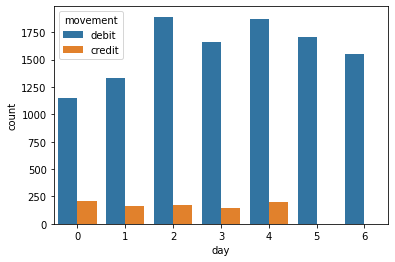

In [30]:
sns.countplot(x="day",hue="movement",data=train)

**Observation(s):**

1) Credit transactions are done on days- monday, tuesday, wednesday, thursday, friday.

2) Most debit transactions are done onwednesday and friday.

### Weekday-wise sum and mean of transaction amount

           sum
day           
0    507580.56
1    329484.19
2    402729.72
3    331402.77
4    516909.84
5     93002.56
6     82174.56


Text(0.5, 1.0, 'Weekday-wise sum of transaction amount')

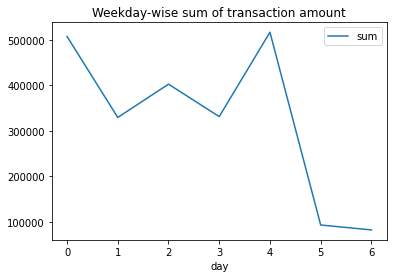

In [31]:
Sum=train.groupby("day")["amount"].agg(['sum'])
print(Sum)
Sum.plot()
plt.title("Weekday-wise sum of transaction amount")

           mean
day            
0    373.221000
1    221.576456
2    195.215570
3    184.010422
4    249.353517
5     54.419286
6     53.015845


Text(0.5, 1.0, 'Weekday-wise mean of transaction amount')

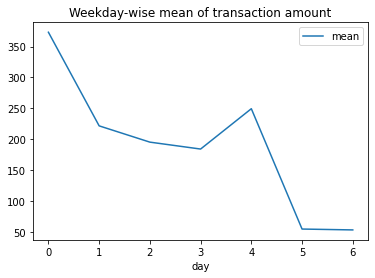

In [32]:
Mean=train.groupby("day")["amount"].agg(['mean'])
print(Mean)
Mean.plot()
plt.title("Weekday-wise mean of transaction amount")

### Monthwise sum and mean of transaction amount

             sum
month           
8      729935.52
9      730550.21
10     802798.47


Text(0.5, 1.0, 'Monthwise sum of transaction amount')

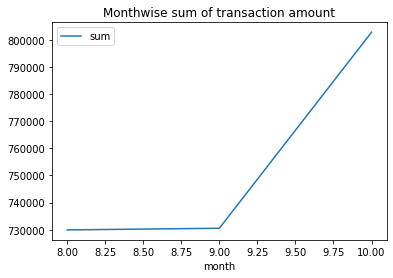

In [33]:
Sum1=train.groupby("month")["amount"].agg(['sum'])
print(Sum1)
Sum1.plot()
plt.title("Monthwise sum of transaction amount")

           mean
day            
0    373.221000
1    221.576456
2    195.215570
3    184.010422
4    249.353517
5     54.419286
6     53.015845


Text(0.5, 1.0, 'Monthwise average of transaction amount')

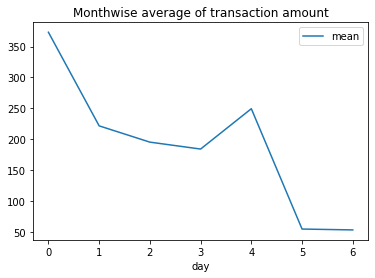

In [34]:
Mean1=train.groupby("day")["amount"].agg(['mean'])
print(Mean1)
Mean1.plot()
plt.title("Monthwise average of transaction amount")

### Datewise sum and mean of transaction amount

                 sum
date                
2018-08-01  29867.94
2018-08-02  21786.32
2018-08-03  38096.58
2018-08-04   6296.05
2018-08-05   4426.50
...              ...
2018-10-27   6971.58
2018-10-28   8438.11
2018-10-29  38549.14
2018-10-30  22062.34
2018-10-31  21967.13

[91 rows x 1 columns]


Text(0.5, 1.0, 'Datewise sum of transaction amount')

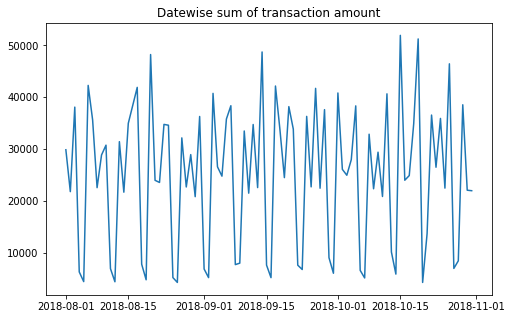

In [35]:
Sum2=train.groupby("date")["amount"].agg(['sum'])
print(Sum2)
plt.figure(figsize=(8,5))
plt.plot(Sum2)
plt.show
plt.title("Datewise sum of transaction amount")

                  mean
date                  
2018-08-01  218.014161
2018-08-02  143.331053
2018-08-03  242.653376
2018-08-04   53.356356
2018-08-05   44.265000
...                ...
2018-10-27   50.155252
2018-10-28   59.007762
2018-10-29  377.932745
2018-10-30  247.891461
2018-10-31  155.795248

[91 rows x 1 columns]


Text(0.5, 1.0, 'Datewise Average of transaction amount')

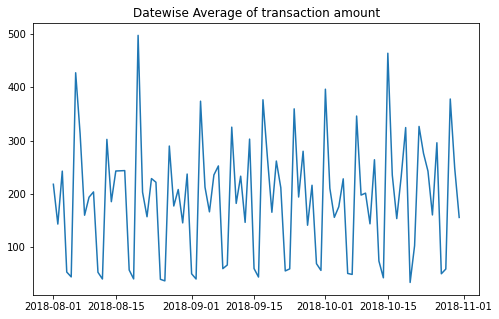

In [36]:
Mean2=train.groupby("date")["amount"].agg(['mean'])
print(Mean2)
plt.figure(figsize=(8,5))
plt.plot(Mean2)
plt.show
plt.title("Datewise Average of transaction amount")

### Hourwise sum and mean of transaction amount

            sum
hour           
0       3053.69
1      10425.31
2      15957.19
3      16606.28
4      18942.27
5      13485.65
6      14742.11
7      19398.65
8      23930.79
9      46785.05
10     32478.23
11    297107.20
12    203100.24
13    371203.19
14    195873.92
15    170249.28
16    174082.53
17    478957.49
18     20516.70
19     29881.85
20     27995.31
21     32983.01
22     23949.94
23     21578.32


Text(0.5, 1.0, 'Hourwise sum of transaction amount')

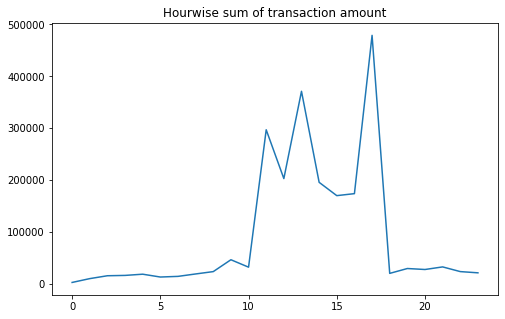

In [37]:
Sum3=train.groupby("hour")["amount"].agg(['sum'])
print(Sum3)
plt.figure(figsize=(8,5))
plt.plot(Sum3)
plt.show
plt.title("Hourwise sum of transaction amount")

            mean
hour            
0      28.274907
1      48.716402
2      75.269764
3      84.725918
4      61.301845
5      64.524641
6      59.205261
7      72.927256
8      43.749159
9      42.301130
10     52.810130
11    315.735600
12    374.033591
13    665.238692
14    258.750225
15    233.858901
16    337.369244
17    587.677902
18     53.568407
19     54.528923
20     46.814900
21     44.511484
22     52.292445
23     50.653333


Text(0.5, 1.0, 'Hourwise Average of transaction amount')

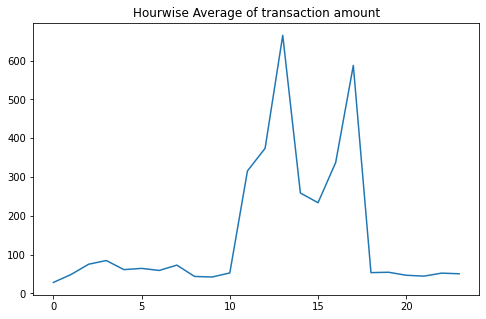

In [38]:
Mean3=train.groupby("hour")["amount"].agg(['mean'])
print(Mean3)
plt.figure(figsize=(8,5))
plt.plot(Mean3)
plt.show
plt.title("Hourwise Average of transaction amount")

### No. of transactions customers make each month

movement  month
credit    10        313
          8         298
          9         272
debit     10       3774
          9        3741
          8        3645
Name: month, dtype: int64


Text(0.5, 1.0, 'Number of Transactions w.r.t. months')

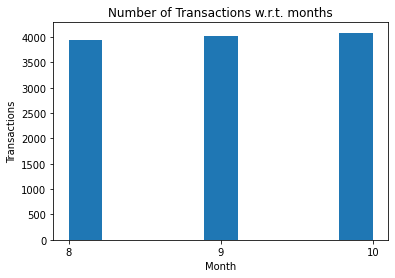

In [39]:
# No. of credit and debit transactions made by customers in respective months
m=train.groupby("movement")["month"].value_counts()
print(m)

plt.hist(train['month'], bins=9)
plt.xlabel('Month')
months=[8,9,10]
plt.xticks(months)
plt.ylabel('Transactions')                                                 
plt.title('Number of Transactions w.r.t. months')

### No. of transactions customers make on weekdays

movement  day
credit    0       207
          4       201
          2       172
          1       160
          3       143
debit     2      1891
          4      1872
          5      1709
          3      1658
          6      1550
          1      1327
          0      1153
Name: day, dtype: int64


Text(0.5, 1.0, 'Number of Transactions w.r.t. weekdays')

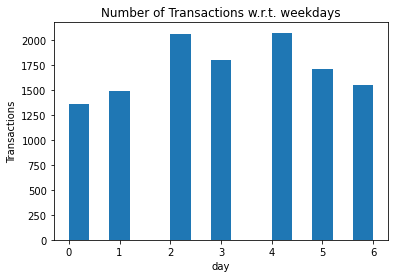

In [40]:
# No. of credit and debit transactions made by customers in respective weekdays
m=train.groupby("movement")["day"].value_counts()
print(m)

plt.hist(train['day'], bins=15)
plt.xlabel('day')
months=[0,1,2,3,4,5,6]
plt.xticks(months)
plt.ylabel('Transactions')                                                 
plt.title('Number of Transactions w.r.t. weekdays')

### Plotting the merchant places using longitudes and latitudes

In [51]:
train[['long','lat']] = train.merchant_long_lat.str.split(" ",expand=True,)
train.head()

,date,time,month,day,hour,account,gender,age,amount,txn_description,movement,merchant_long_lat,long,lat
0,2018-08-01,01:01:15,8,2,1,ACC-1598451071,F,26,16.25,POS,debit,153.38 -27.99,153.38,-27.99
1,2018-08-01,01:13:45,8,2,1,ACC-1598451071,F,26,14.19,SALES-POS,debit,151.21 -33.87,151.21,-33.87
2,2018-08-01,01:26:15,8,2,1,ACC-1222300524,M,38,6.42,POS,debit,151.21 -33.87,151.21,-33.87
3,2018-08-01,01:38:45,8,2,1,ACC-1037050564,F,40,40.90,SALES-POS,debit,153.05 -26.68,153.05,-26.68
4,2018-08-01,01:51:15,8,2,1,ACC-1598451071,F,26,3.25,SALES-POS,debit,153.44 -28.06,153.44,-28.06


In [0]:
train['long'] = train['long'].astype(float)
train['lat'] = train['lat'].astype(float)

In [0]:
gdf = geopandas.GeoDataFrame(
    train, geometry=geopandas.points_from_xy(train.long, train.lat))

In [55]:
gdf.head()

,date,time,month,day,hour,account,gender,age,amount,txn_description,movement,merchant_long_lat,long,lat,geometry
0,2018-08-01,01:01:15,8,2,1,ACC-1598451071,F,26,16.25,POS,debit,153.38 -27.99,153.38,-27.99,POINT (153.38000 -27.99000)
1,2018-08-01,01:13:45,8,2,1,ACC-1598451071,F,26,14.19,SALES-POS,debit,151.21 -33.87,151.21,-33.87,POINT (151.21000 -33.87000)
2,2018-08-01,01:26:15,8,2,1,ACC-1222300524,M,38,6.42,POS,debit,151.21 -33.87,151.21,-33.87,POINT (151.21000 -33.87000)
3,2018-08-01,01:38:45,8,2,1,ACC-1037050564,F,40,40.90,SALES-POS,debit,153.05 -26.68,153.05,-26.68,POINT (153.05000 -26.68000)
4,2018-08-01,01:51:15,8,2,1,ACC-1598451071,F,26,3.25,SALES-POS,debit,153.44 -28.06,153.44,-28.06,POINT (153.44000 -28.06000)


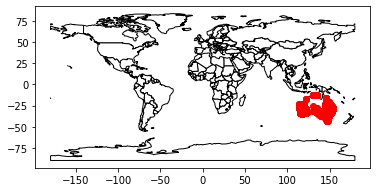

In [60]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()